### First Steps with Convolution Neural Network

This script will help you build your first CNN model.

In [1]:
## Load Libraries

import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
## load files
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
train.head()

,image_id,label
0,train_1a,rice
1,train_1b,candy
2,train_1c,jam
3,train_1d,coffee
4,train_2a,vinegar


In [4]:

le = LabelEncoder()
train['label_enc'] = le.fit_transform(train.label)
train.head()

,image_id,label,label_enc
0,train_1a,rice,17
1,train_1b,candy,2
2,train_1c,jam,11
3,train_1d,coffee,6
4,train_2a,vinegar,23


In [5]:
print ('The train data has {} images.'.format(train.shape[0]))
print ('The test data has {} images.'.format(test.shape[0]))

The train data has 3215 images.
The test data has 1732 images.


In [6]:
# unique label count
print ('The train data has {} unique labels'.format(train['label'].nunique()))

The train data has 25 unique labels


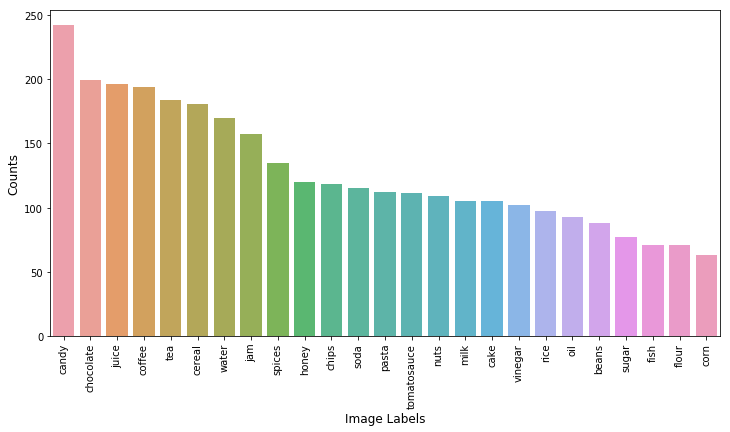

In [7]:
# lets see the distribution

label_counts = train.label.value_counts()
#print(label_counts)
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [8]:
# set path to read train and test image
TRAIN_PATH = 'input/train_img/'
TEST_PATH = 'input/test_img/'

In [10]:
# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256,256)) # you can resize to  (128,128) or (256,256)
    return img

In [11]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [54]:
for lbl in label_counts.index:
    #print(lbl)
    save_to_dir = 'input/' + lbl
    if not os.path.
    os.mkdir(save_to_dir)
    img_id = train[train['label'] == lbl]['image_id'].values
    n = 1000//len(img_id)
    for img in tqdm(img_id):    
        x = read_image(TRAIN_PATH + '{}.png'.format(img))
        cv2.imwrite('input/' + lbl+ '/' + img +'.png', cv2.cvtColor(x, cv2.COLOR_RGB2BGR))
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir= save_to_dir, save_prefix=lbl, save_format='png'):
            i += 1
            if i > n:
                break
    

100%|██████████| 63/63 [00:21<00:00,  2.96it/s]


In [44]:

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir= 'input/'+ lbl, save_prefix=lbl, save_format='png'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely


False

In [36]:
cv2.imwrite('input/' + lbl+ '/' + lbl +'.png', im)        

True

In [ ]:
train_data = []
test_data = []
train_labels = train['label'].values

for img in tqdm(train['image_id'].values):
    train_data.append(read_image(TRAIN_PATH + '{}.png'.format(img)))
    
for img in tqdm(test['image_id'].values):
    test_data.append(read_image(TEST_PATH + '{}.png'.format(img)))

In [ ]:
# normalize the images
x_train = np.array(train_data, np.float32) / 255.
x_test = np.array(test_data, np.float32) / 255.

In [ ]:
# target variable - encoding numeric value
#label_list = train['label'].tolist()
#Y_train = {k:v for v,k in enumerate(set(label_list))}
#y_train = [Y_train[k] for k in label_list]  
y_train = train.label_enc.values

In [ ]:
le.classes_

In [ ]:
# check some images
def show_images(ix):
    image_train = read_image(TRAIN_PATH + train.image_id[ix] + '.png')
    image_test = read_image(TEST_PATH + test.image_id[ix] + '.png')
    
    pair = np.concatenate((image_train, image_test), axis=1)
    
    plt.figure(figsize = (6,6))
    plt.imshow(pair)
    
# first 4 images in train and test set
for idx in range(4):
    show_images(idx)

In [ ]:
## just images doesn't help, lets see the images with their respective labels
plt.rc('axes', grid=False)

_, axs = plt.subplots(3,3, sharex = 'col', sharey='row', figsize = (7,7))
axs = axs.ravel()

# lets see first 8 images - you can increase i value to see more images
for i, (image_name, label) in enumerate(zip(train.image_id, train.label)):
    if i <= 8:
        img = read_image(TRAIN_PATH + image_name + '.png')
        axs[i].imshow(img)
        axs[i].set_title('{} - {}'.format(image_name, label))
    else:
        break

In [ ]:
# lets train our first model, we'll use keras.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
## keras accepts target variable as a ndarray so that we can set one output neuron per class
y_train = to_categorical(y_train)

In [ ]:
y_train.shape

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
datagen.fit(x_train)


In [ ]:
## neural net architechture

model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (128,128,3))) # if you resize the image above, shape would be (128,128,3)
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

In [ ]:
#model.fit(x_train, y_train, batch_size=10, epochs=10, validation_split=0.3, callbacks=[early_stops])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)

In [ ]:
# make prediction
predictions = model.predict(x_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis= 1)

In [ ]:
predictions

In [ ]:
# get predicted labels
#y_maps = dict()
#y_maps = {v:k for k, v in Y_train.items()}
#pred_labels = [y_maps[k] for k in predictions]
pred_labels = le.inverse_transform(predictions)

In [ ]:
pred_labels

In [ ]:
# make submission
sub1 = pd.DataFrame({'image_id':test.image_id, 'label':pred_labels})
#sub1.to_csv('sub_one.csv', index=False)

In [ ]:
sub1.label.value_counts()

In [ ]:
## lets see what our classifier predicts on test images

# top 5 predictions
for i in range(5):
    print('I see this product is {}'.format(pred_labels[i]))
    plt.imshow(read_image(TEST_PATH +'{}.png'.format(test.image_id[i])))
    plt.show()